# Biophysics Lab - 3/29/2019

## Author: Stephanie M. Yan

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

## 1. For a protein with a 2-state equilibrium, what is the partition function?

### A. Plot dG vs T for all three cases 

In [2]:
# Define R and Tm
R = (1.987/1000)
Tm = 50

# Define dH and dS for all three cases
deltaHref1 = 50
deltaSref1 = deltaHref1/Tm

deltaHref2 = 100
deltaSref2 = deltaHref2/Tm

deltaHref3 = 150
deltaSref3 = deltaHref3/Tm

# Set range of temperatures
temps = np.array(np.arange(1,300),dtype=np.float128)

# Calculate dG for all three cases
G1 = deltaHref1 - temps*deltaSref1
G2 = deltaHref2 - temps*deltaSref2
G3 = deltaHref3 - temps*deltaSref3

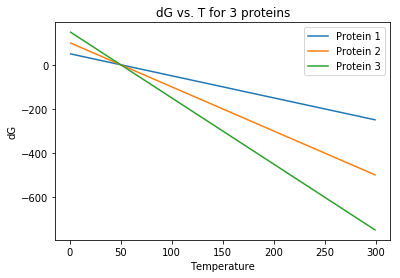

In [3]:
# Plot dG vs. temperature
fig, ax = plt.subplots()
ax.plot(temps,G1)
ax.plot(temps,G2)
ax.plot(temps,G3)
ax.set_xlabel("Temperature")
ax.set_ylabel("dG")
ax.set_title("dG vs. T for 3 proteins")
ax.legend(["Protein 1", "Protein 2", "Protein 3"])

### B. Plot Pu and Pf for all three cases 

In [4]:
# Statistical weight for folded protein is 1
statwtF = 1

# Calculate statistical weights for all three unfolded protein cases
swU1 = np.exp((-G1)/(R*temps))
swU2 = np.exp((-G2)/(R*temps))
swU3 = np.exp((-G3)/(R*temps))

In [5]:
# Calculate partition function for all three cases

pf1 = statwtF + swU1
pf2 = statwtF + swU2
pf3 = statwtF + swU3

In [6]:
# Calculate Pf for all three cases
popF1 = statwtF/pf1
popF2 = statwtF/pf2
popF3 = statwtF/pf3

# Calculate Pu for all three cases
popU1 = swU1/pf1
popU2 = swU2/pf2
popU3 = swU3/pf3

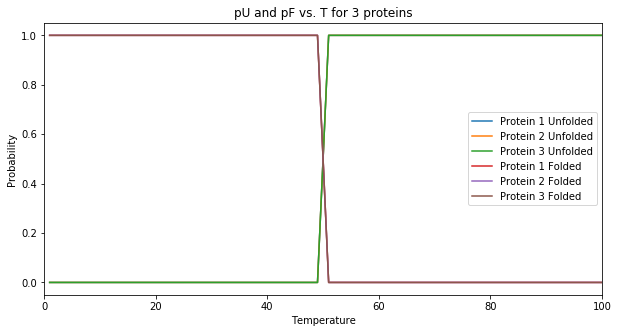

In [7]:
# Plot Pf and Pu vs. temperature
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(temps,popU1)
ax.plot(temps,popU2)
ax.plot(temps,popU3)
ax.plot(temps,popF1)
ax.plot(temps,popF2)
ax.plot(temps,popF3)
ax.set_xlim((0,100))
ax.set_xlabel("Temperature")
ax.set_ylabel("Probability")
ax.set_title("pU and pF vs. T for 3 proteins")
ax.legend(["Protein 1 Unfolded", "Protein 2 Unfolded", "Protein 3 Unfolded", \
          "Protein 1 Folded", "Protein 2 Folded", "Protein 3 Folded"])

### C. Generate the observed data for case 2

In [8]:
# Calculate obsF and obsU using Pf and Pu
obsF = popF2*(0.4*temps + 3) + np.random.normal(0,0.8,len(temps))
obsU = popU2*(0.5*temps + 20) + np.random.normal(0,0.8,len(temps))

obs = obsF + obsU

# Output to dataframe
df = pd.DataFrame(
    {"temp" : temps,
     "obs" : obs
    })

df

,temp,obs
0,1.0,3.441419
1,2.0,3.069804
2,3.0,5.236588
3,4.0,5.683449
4,5.0,6.363827
5,6.0,7.077786
6,7.0,6.867913
7,8.0,6.432560
8,9.0,7.836849
9,10.0,7.828235


### D. Fit the data you just generated

* Folded observable signal: slope 0.5, intercept 19.7
* Unfolded observable signal: slope 0.4, intercept 3.5
* Enthalpy: 87.6
* Tm: 50

In [9]:
# Thank you James for this code
# Define function for fitting
def TMelt(X,Yd,Bd,Yn,Bn,H,Tf):
    return (((Yn*X+Bn)+(Yd*X+Bd)*np.exp(-(H-X*(H/Tf))/(0.001987*X)))/(1+np.exp(-(H-X*(H/Tf))/(0.001987*X))))

# Initial guess
po = [0,0,0,0,100,330]

# Fit data
popt,pcov = curve_fit(TMelt, temps, obs, po, bounds = ((-100,-100,-100,-100,0,0),(100,100,100,100,10000,400)))
print(popt)

[ 0.50206255 19.6916803   0.371079    3.54622521 87.55250312 49.9990784 ]


Text(0.5,1,'Fitted curve for Case 2')

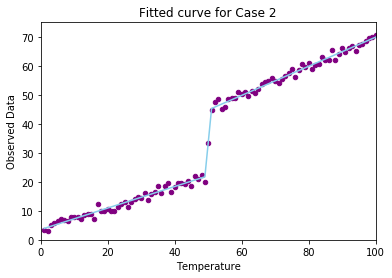

In [10]:
fig, ax = plt.subplots()
ax.scatter(temps,obs,color="purple",s=20)
ax.plot(temps,TMelt(temps,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]),color="skyblue")
ax.set_xlim((0,100))
ax.set_ylim((0,75))
ax.set_xlabel("Temperature")
ax.set_ylabel("Observed Data")
ax.set_title("Fitted curve for Case 2")

## 2. Fit example fluorescence data of a temperature melt

* Folded observable signal: slope 0.18, intercept 2.6
* Unfolded observable signal: slope -0.26, intercept -2.9
* Enthalpy: 106
* Tm: 317

In [25]:
data = pd.read_table("~/Documents/Classes/Biophysics/Yan.csv",sep=",")

temps2 = data.iloc[:,0]
obs2 = data.iloc[:,1]

# Define function for fitting
def TMelt2(X2,Yd2,Bd2,Yn2,Bn2,H2,Tf2):
    return (((Yn2*X2+Bn2)+(Yd2*X2+Bd2)*np.exp(-(H2-X2*(H2/Tf2))/(0.001987*X2)))/(1+np.exp(-(H2-X2*(H2/Tf2))/(0.001987*X2))))

# Initial guess
p02 = [0,0,0,0,100,330]

# Fit data
popt2, pcov2 = curve_fit(TMelt2, temps2, obs2, p02, bounds = ((-100,-100,-100,-100,0,0),(100,100,100,100,10000,400)))
print(popt2)

[ 1.81362065e-01  2.63888822e+01 -2.63139821e-01 -2.89266614e+00
  1.05822470e+02  3.16936041e+02]
